<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/Outlier_Detection_and_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

# Generate skewed salary data with outliers at both ends
salary_mean = 60000
salary_std = 10000
num_samples = 500

# Generate random outliers for both ends
num_outliers = 10

salary_data = np.random.normal(loc=salary_mean, scale=salary_std, size=num_samples)
lower_outliers = np.random.randint(10000, 30000, num_outliers)  # Generate 10 lower outliers
upper_outliers = np.random.randint(120000, 150000, num_outliers)  # Generate 10 upper outliers

salary_data = np.concatenate((salary_data, lower_outliers, upper_outliers))

# Generate near normal distribution for avg daily working hours
working_hours_mean = 8
working_hours_std = 2
working_hours_data = np.random.normal(loc=working_hours_mean, scale=working_hours_std, size=num_samples)

outliers_hours = np.random.randint(1,15,2*num_outliers)

working_hours_data = np.concatenate((working_hours_data,outliers_hours))

# Generate happiness index values
happiness_index_data = np.random.normal(5, 1, num_samples + (2 * num_outliers))

# Create a DataFrame
data = pd.DataFrame({'salary': salary_data, 'avg_daily_working_hours': working_hours_data, 'happiness_index': happiness_index_data})


data

,salary,avg_daily_working_hours,happiness_index
0,69351.765078,11.872094,5.973402
1,72059.349609,7.970241,4.144600
2,58540.088181,6.532566,4.028290
3,62667.480704,8.140970,4.032645
4,52014.771343,7.902010,4.908885
...,...,...,...
515,120050.000000,1.000000,4.301410
516,134601.000000,6.000000,4.898096
517,139986.000000,4.000000,3.340962
518,120560.000000,4.000000,5.481795


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Detect Outliers in the Data:

Outliers in the data can be detected using plotting:
1. Histograms
2. KdePlot
3. Scatterplot
4. Boxplot

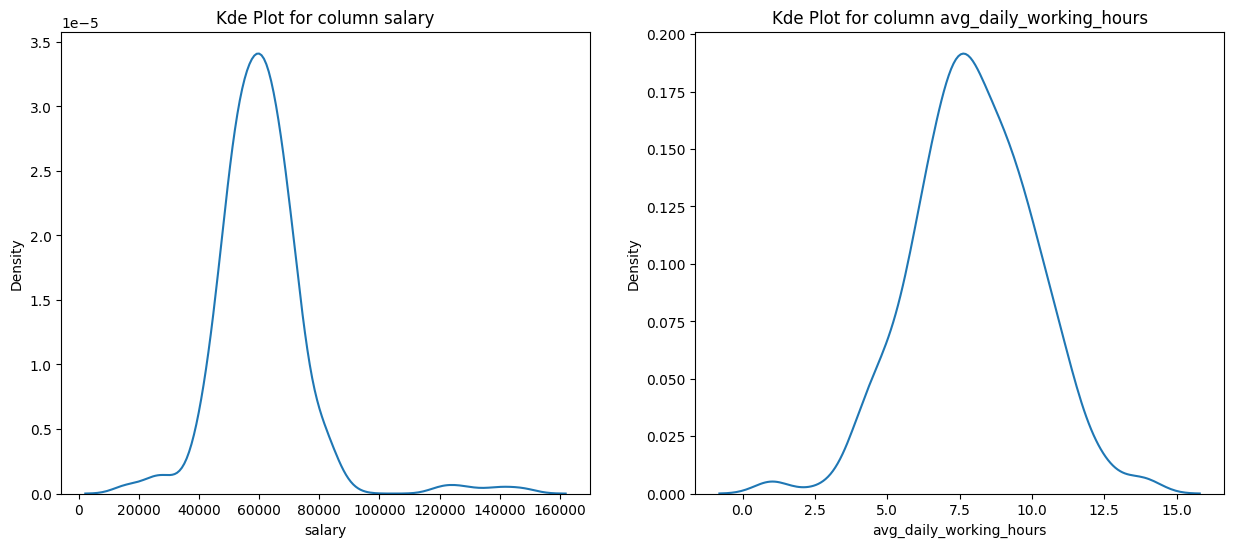

In [7]:
# plot kde plot for the input columns

fig,ax = plt.subplots(1,2,figsize=(15,6))

for ind,col in enumerate(data.columns[:-1]):
    sns.kdeplot(data=data,x=col,ax=ax[ind])
    ax[ind].set_title(f'Kde Plot for column {col}')

plt.show()

From observing the Kde plots the:
1. Salary column appears to be skewed and is right skewed in nature

2. The avg_daily working hours column appears to be normally distributed.

In [8]:
# skewness of input columns

data[data.columns[:-1]].skew()

salary                     1.876244
avg_daily_working_hours   -0.090560
dtype: float64

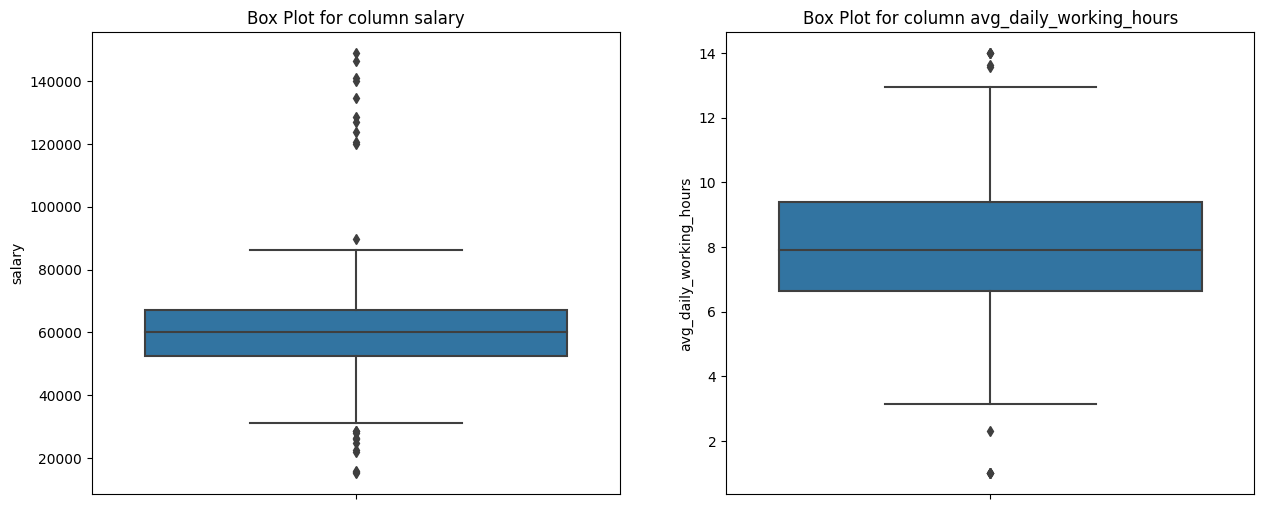

In [9]:
# plot box plot for the input columns

fig,ax = plt.subplots(1,2,figsize=(15,6))

for ind,col in enumerate(data.columns[:-1]):
    sns.boxplot(data=data,y=col,ax=ax[ind])
    ax[ind].set_title(f'Box Plot for column {col}')

plt.show()

- There are outlier data points in the salary column on both ends of the distribution.
- There are outliers in the avg daily working hours of the column. There is are data points on both ends of the distribution.

### Method for outlier treatment:
1. Trimming.
2. Capping.
3. Data Transformation.
4. Using robust techniques.
5. Binning and Discretization.

Once outliers are detected, there are several approaches you can consider to deal with them. The choice of method depends on the nature of your data, the problem you're solving, and the impact of outliers on your analysis or model performance. Here are some common approaches:

1. **Removal of Outliers:**
   - Simply remove the outlier data points from the dataset. However, be cautious with this approach, as it can lead to loss of valuable information and potential bias in your analysis.
   - Use this approach when outliers are due to data entry errors or other clear anomalies that are unlikely to be representative of the underlying phenomenon.

2. **Transformation:**
   - Apply mathematical transformations to the data to reduce the impact of outliers. Common transformations include log transformation, square root transformation, or Box-Cox transformation.
   - Transformation can help make the data more normally distributed and stabilize variances, which can be beneficial for certain statistical analyses and modeling techniques.

3. **Capping or Winsorization:**
   - Replace outlier values with a predefined threshold or the nearest non-outlier values within a certain percentile range. This can help mitigate the impact of outliers without completely discarding them.
   - Winsorization is a form of capping that is less extreme than removal and can help maintain the overall distribution of the data.

4. **Binning or Discretization:**
   - Group data points into bins or discrete categories. This can help mitigate the impact of extreme values and make the analysis more robust to outliers.
   - Binning can be useful when the exact values of outliers are not as important as their general range or category.

5. **Robust Statistical Methods:**
   - Use statistical techniques that are less sensitive to outliers. For example, instead of mean, use median as a measure of central tendency. Robust regression techniques like Huber regression or Theil-Sen regression are less affected by outliers.
   - These methods can help provide more accurate estimates when outliers are present.

6. **Advanced Modeling Techniques:**
   - Some machine learning algorithms are inherently robust to outliers. For example, tree-based models like Random Forests and Gradient Boosting Trees are less sensitive to outliers compared to linear regression.
   - Using appropriate modeling techniques can reduce the influence of outliers on model predictions.


----

Both the Z-Score and the Interquartile Range (IQR) method are used to detect outliers, but they have different approaches and use cases. The choice between them depends on the nature of your data and the specific goals of your analysis.

**Z-Score Method:**
The Z-Score method measures how many standard deviations a data point is away from the mean. It assumes that the data follows a normal distribution. Data points with a Z-Score above a certain threshold (usually 2 to 3) are considered outliers. This method is sensitive to extreme values and can be affected by skewness in the data.

**IQR Method:**
The Interquartile Range (IQR) is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data. The IQR method defines outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method is more robust to extreme values and works well for skewed or non-normal distributions.

**When to Use Each Method:**
- Use the **Z-Score method** when you have a relatively normal distribution and want to identify extreme values that are several standard deviations away from the mean. However, be cautious when dealing with skewed data, as the Z-Score might incorrectly classify some legitimate data points as outliers.
- Use the **IQR method** when your data is skewed or not normally distributed. It's especially useful when you want to identify outliers without being overly influenced by extreme values. The IQR method is less sensitive to outliers and can provide a more accurate representation of the central data.

**Winsorization:**
Winsorization is a data transformation technique that deals with outliers by limiting extreme values instead of removing them. Instead of completely discarding outliers, Winsorization replaces them with the nearest non-outlier values within a certain percentile range. This approach helps to reduce the impact of outliers on statistical analysis or modeling while retaining their influence on the data.

### Salary Column (IQR method)

In [10]:
# statistical description of the salary column

data['salary'].describe()

count       520.000000
mean      60654.862531
std       15180.269470
min       15211.000000
25%       52580.243163
50%       60015.388658
75%       67089.817497
max      148885.000000
Name: salary, dtype: float64

In [14]:
# observe outlier data points in the salary column

# skewed column we use the IQR method

q1,q3  = data['salary'].quantile([0.25,0.75])

# calculate the iqr
iqr = q3 - q1

# calculate the upper and lower bounds

lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

# filter out the rows outside the lower and upper bounds
upper_filter = data['salary'] > upper_bound
lower_filter = data['salary'] < lower_bound

temp_data = data[(upper_filter)|(lower_filter)]['salary']

# shape of the filtered rows
print('The shape of filtered data is',temp_data.shape)

temp_data

The shape of filtered data is (22,)


52      22625.805116
132     89871.231032
500     25962.000000
501     28468.000000
502     15753.000000
503     28608.000000
504     15719.000000
505     15211.000000
506     28013.000000
507     21785.000000
508     26281.000000
509     24914.000000
510    141033.000000
511    128700.000000
512    146507.000000
513    127056.000000
514    148885.000000
515    120050.000000
516    134601.000000
517    139986.000000
518    120560.000000
519    123705.000000
Name: salary, dtype: float64

In [15]:
print('The upper_bound value for salary column is',upper_bound)
print('The lower_bound value for salary column is',lower_bound)

The upper_bound value for salary column is 88854.17899665202
The lower_bound value for salary column is 30815.881663034255


In [12]:
# percentage of outliers

print('The percentage of rows that are outliers in the salary column are',(temp_data.shape[0]/data.shape[0])*100)

The percentage of rows that are outliers in the salary column are 4.230769230769231


- The percentage of rows in the data that are outliers is very high and is only viable for capping. Trimming and removal such large propotion of data is not feasable as it will amount to a data loss.

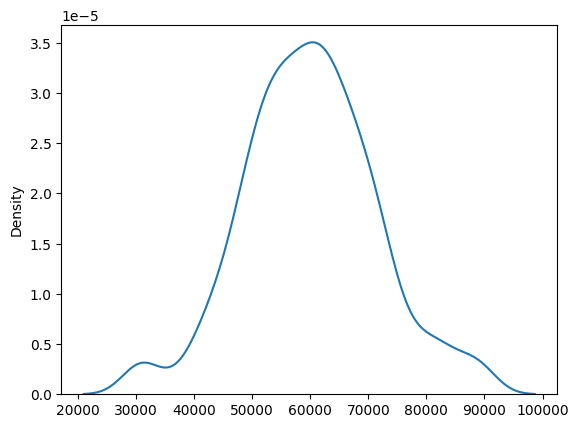

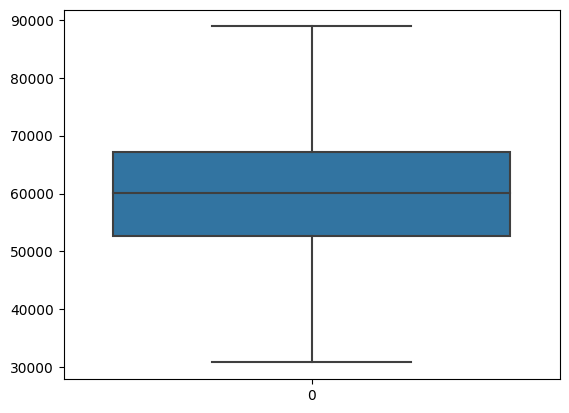

In [13]:
# manual capping

salary_capped = np.where(data['salary'] > upper_bound, upper_bound,
                         np.where(data['salary'] < lower_bound,lower_bound,data['salary']))

# plot kde plot
sns.kdeplot(salary_capped)
plt.show()

# plot boxplot
sns.boxplot(salary_capped)
plt.show()

In [20]:
np.min(salary_capped),np.max(salary_capped)

(30815.881663034255, 88854.17899665202)

In [16]:
! pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 7.9 MB/s eta 0:00:00


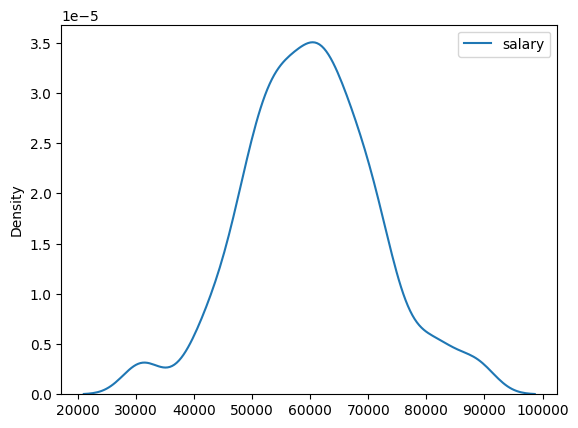

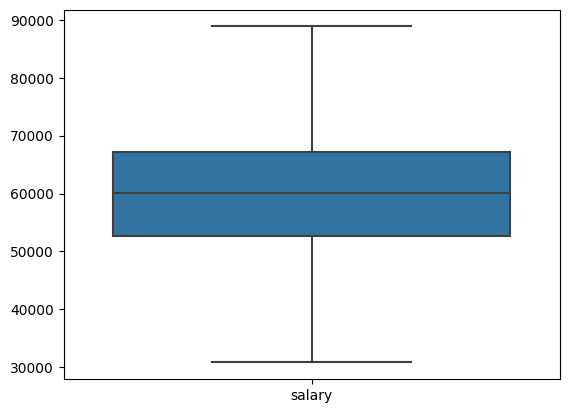

In [17]:
# using function

from feature_engine.outliers import Winsorizer,OutlierTrimmer

winsor = Winsorizer(capping_method='iqr',fold=1.5,tail='both')

# fit transform the salary column

salary_trans = winsor.fit_transform(data[['salary']])

# plot kde plot
sns.kdeplot(salary_trans)
plt.show()

# plot boxplot
sns.boxplot(salary_trans)
plt.show()

- From the above boxplot we can clearly observe that the outliers have been capped in the salary column

The percentile approach is another method used to handle outliers by replacing extreme values with values at a certain percentile threshold. This approach is similar to capping or winsorization and aims to mitigate the impact of outliers on your analysis or model while retaining some information about their magnitude.

Here's how the percentile approach works:

1. **Identify Percentile Thresholds:** You specify two percentile thresholds, one for the lower end (e.g., 5th percentile) and one for the upper end (e.g., 95th percentile). These thresholds define the range of values that will be considered as "normal" data points.

2. **Replace Outliers:** Any data point below the lower percentile threshold is replaced with the value at that threshold, and any data point above the upper percentile threshold is replaced with the value at that threshold.

3. **Impact on Distribution:** This approach helps maintain the general distribution of the data while reducing the influence of extreme values. It effectively "trims" the tails of the distribution, making the data more robust to outliers.

The percentile approach is particularly useful when you want to preserve the overall shape of the data distribution and retain some information about the variability of the data. It strikes a balance between completely removing outliers and keeping their influence intact.


In [46]:
# apply the percentile method

per_95,per_05 = data['salary'].quantile([0.95,0.05])

percentile_salary = data.loc[(data['salary']>per_95)|(data['salary']<per_05),['salary']]


percentile_salary.shape

(52, 1)

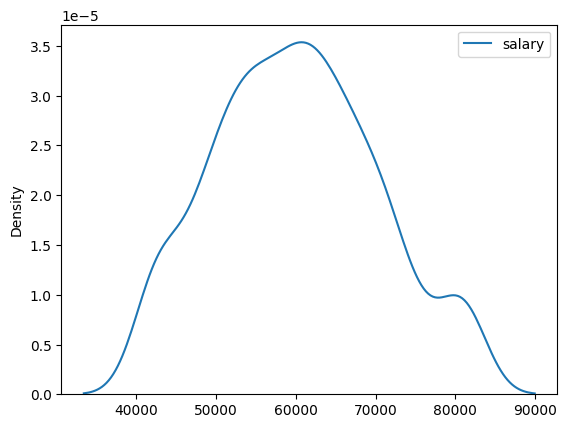

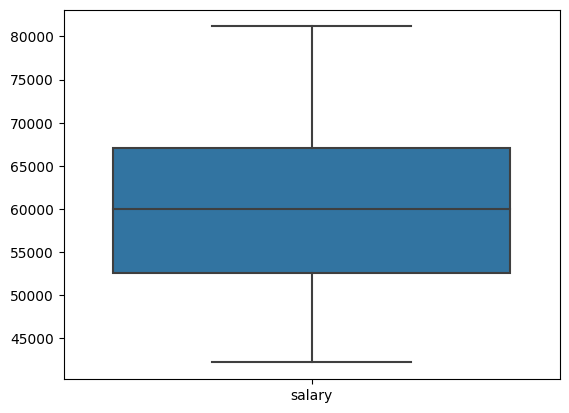

In [47]:
# cap using the percentile method

winsor = Winsorizer(capping_method='quantiles',tail='both',
                    fold=0.05)

percentile_cap = winsor.fit_transform(data[['salary']])

# plot kde plot
sns.kdeplot(percentile_cap)
plt.show()

# plot boxplot
sns.boxplot(percentile_cap)
plt.show()

---

### Avg_working_hours (z-score method)

In [21]:
# skewness of the column

data['avg_daily_working_hours'].skew()

-0.09056011625641575

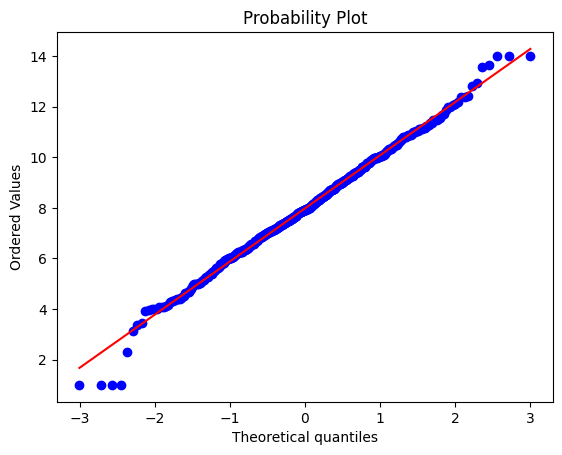

In [22]:
from scipy.stats import probplot

probplot(x=data['avg_daily_working_hours'],plot=plt)
plt.show()

**Majority of the data points are on the plot which shows that it is normally distributed**

In [23]:
# calculate the z score for the column

working_hrs_mean = np.mean(data['avg_daily_working_hours'])
working_hrs_std = np.std(data['avg_daily_working_hours'])

data['z_score'] = (data['avg_daily_working_hours'] - working_hrs_mean) / working_hrs_std

In [24]:
data.head()

,salary,avg_daily_working_hours,happiness_index,z_score
0,69351.765078,11.872094,5.973402,1.861237
1,72059.349609,7.970241,4.144600,-0.002451
2,58540.088181,6.532566,4.028290,-0.689145
3,62667.480704,8.140970,4.032645,0.079096
4,52014.771343,7.902010,4.908885,-0.035041


In [25]:
# find the outliers in the data

filt_upper = data['z_score'] > 3
filt_lower = data['z_score'] < -3

temp_df = data.loc[(filt_upper)|(filt_lower),['avg_daily_working_hours']]
temp_df

,avg_daily_working_hours
508,1.0
513,1.0
515,1.0
519,1.0


In [26]:
# percentage of outliers

print('The percentage of outliers in the avg daily working hours column is',(temp_df.shape[0]/data.shape[0])*100)

The percentage of outliers in the avg daily working hours column is 0.7692307692307693


In [27]:
# trimming of outliers

# manual technique
filt_upper = data['z_score'] < 3
filt_lower = data['z_score'] > -3

trimmed_avg_working_hrs = data.loc[(filt_upper)&(filt_lower),['avg_daily_working_hours']]

trimmed_avg_working_hrs.shape

(516, 1)

The rows which were outliers have been removed from the data

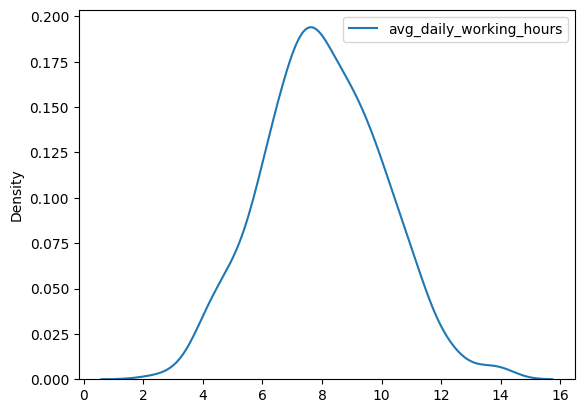

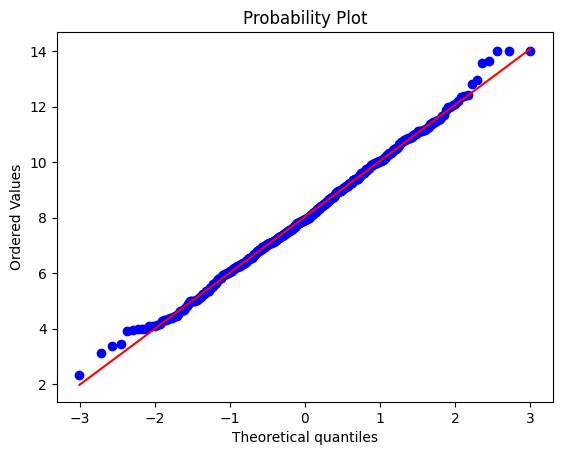

In [32]:
# plot kde plot
sns.kdeplot(trimmed_avg_working_hrs)
plt.show()

# plot probplot
probplot(x=trimmed_avg_working_hrs.values.reshape(trimmed_avg_working_hrs.shape[0],),plot=plt)
plt.show()

In [29]:
# trimming using a function

trim = OutlierTrimmer(capping_method='gaussian',tail='both',fold=3)

# fit transform the column
trimmed_column = trim.fit_transform(data[['avg_daily_working_hours']])

trimmed_column.shape

(516, 1)

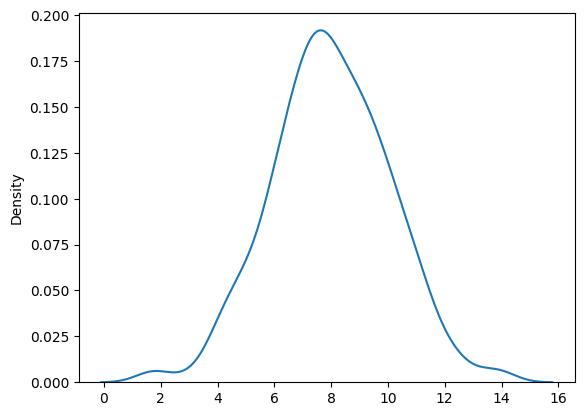

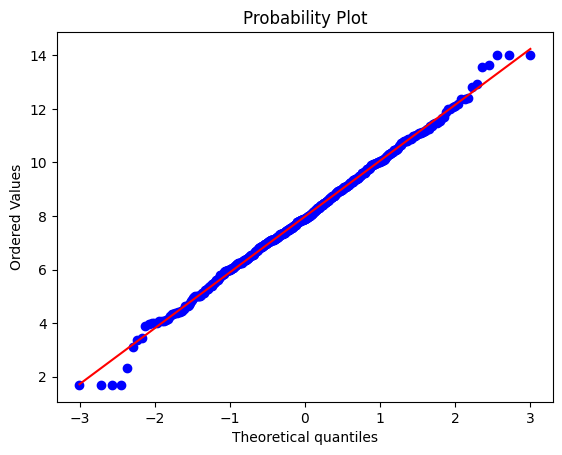

In [31]:
# manual capping of outliers
upper_bound  = working_hrs_mean + (3 * working_hrs_std)
lower_bound  = working_hrs_mean - (3 * working_hrs_std)

filt_upper = data['avg_daily_working_hours'] > upper_bound
filt_lower = data['avg_daily_working_hours'] < lower_bound

capped_avg_working_hrs = np.where(data['avg_daily_working_hours'] > upper_bound,upper_bound,
                                  np.where(data['avg_daily_working_hours'] < lower_bound,lower_bound,
                                           data['avg_daily_working_hours']))

# plot kde plot
sns.kdeplot(capped_avg_working_hrs)
plt.show()

# plot probplot
probplot(x=capped_avg_working_hrs.reshape(capped_avg_working_hrs.shape[0]),plot=plt)
plt.show()

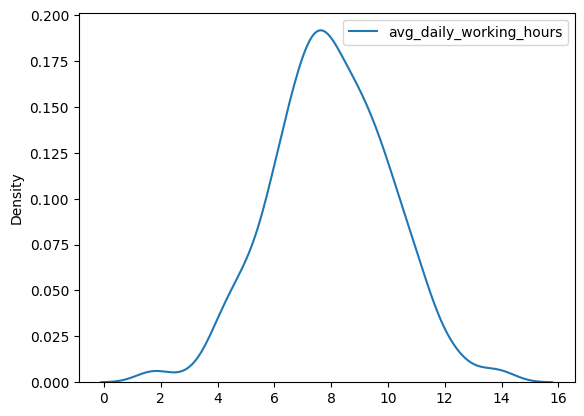

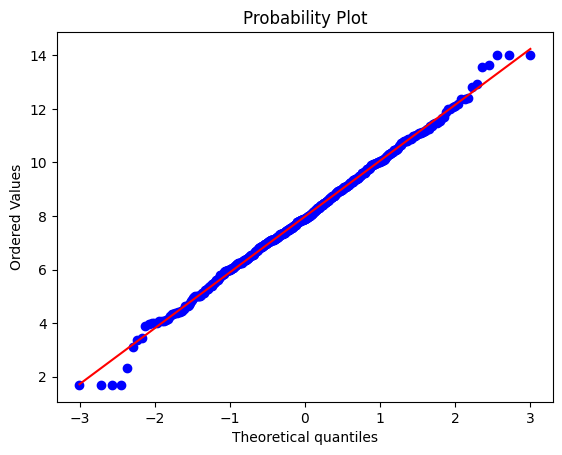

In [33]:
# capping of the outliers

winsor = Winsorizer(capping_method='gaussian',fold=3,tail='both')

# fit transform the salary column

avg_working_hrs_capped = winsor.fit_transform(data[['avg_daily_working_hours']])

# plot kde plot
sns.kdeplot(avg_working_hrs_capped)
plt.show()

# plot boxplot
probplot(x=avg_working_hrs_capped.values.reshape(520,),plot=plt)
plt.show()

The percentile approach is another method used to handle outliers by replacing extreme values with values at a certain percentile threshold. This approach is similar to capping or winsorization and aims to mitigate the impact of outliers on your analysis or model while retaining some information about their magnitude.

Here's how the percentile approach works:

1. **Identify Percentile Thresholds:** You specify two percentile thresholds, one for the lower end (e.g., 5th percentile) and one for the upper end (e.g., 95th percentile). These thresholds define the range of values that will be considered as "normal" data points.

2. **Replace Outliers:** Any data point below the lower percentile threshold is replaced with the value at that threshold, and any data point above the upper percentile threshold is replaced with the value at that threshold.

3. **Impact on Distribution:** This approach helps maintain the general distribution of the data while reducing the influence of extreme values. It effectively "trims" the tails of the distribution, making the data more robust to outliers.

The percentile approach is particularly useful when you want to preserve the overall shape of the data distribution and retain some information about the variability of the data. It strikes a balance between completely removing outliers and keeping their influence intact.


In [34]:
# apply the percentile method

per_99,per_01 = data['avg_daily_working_hours'].quantile([0.99,0.01])

data.loc[(data['avg_daily_working_hours']>per_99)|(data['avg_daily_working_hours']<per_01),['avg_daily_working_hours']]

,avg_daily_working_hours
195,12.944751
246,13.640223
299,3.129131
381,2.318728
398,13.574823
501,14.000000
507,14.000000
508,1.000000
512,14.000000
513,1.000000


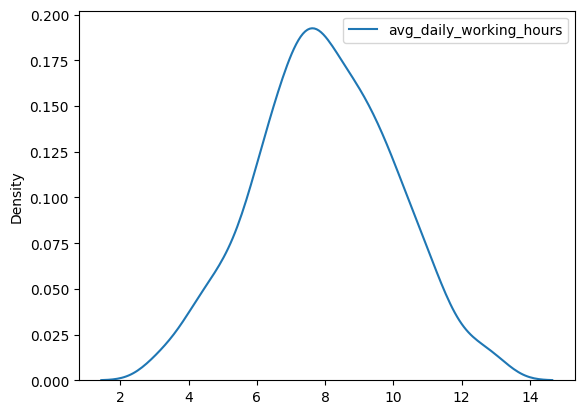

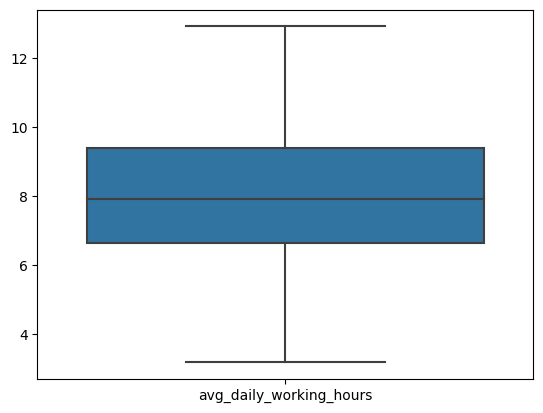

In [35]:
# cap using the percentile method

winsor = Winsorizer(capping_method='quantiles',tail='both',
                    fold=0.01)

percentile_cap = winsor.fit_transform(data[['avg_daily_working_hours']])

# plot kde plot
sns.kdeplot(percentile_cap)
plt.show()

# plot boxplot
sns.boxplot(percentile_cap)
plt.show()

## Transform the input Columns

In [42]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer().set_output(transform='pandas')

# fit and transform the input
data_trans = pt.fit_transform(data[data.columns[:-2]])

data_trans

,salary,avg_daily_working_hours
0,0.647270,1.904073
1,0.815168,-0.018942
2,-0.068707,-0.701437
3,0.213908,0.063146
4,-0.542900,-0.051689
...,...,...
515,3.287028,-3.122420
516,3.905790,-0.949973
517,4.123850,-1.858970
518,3.309507,-1.858970


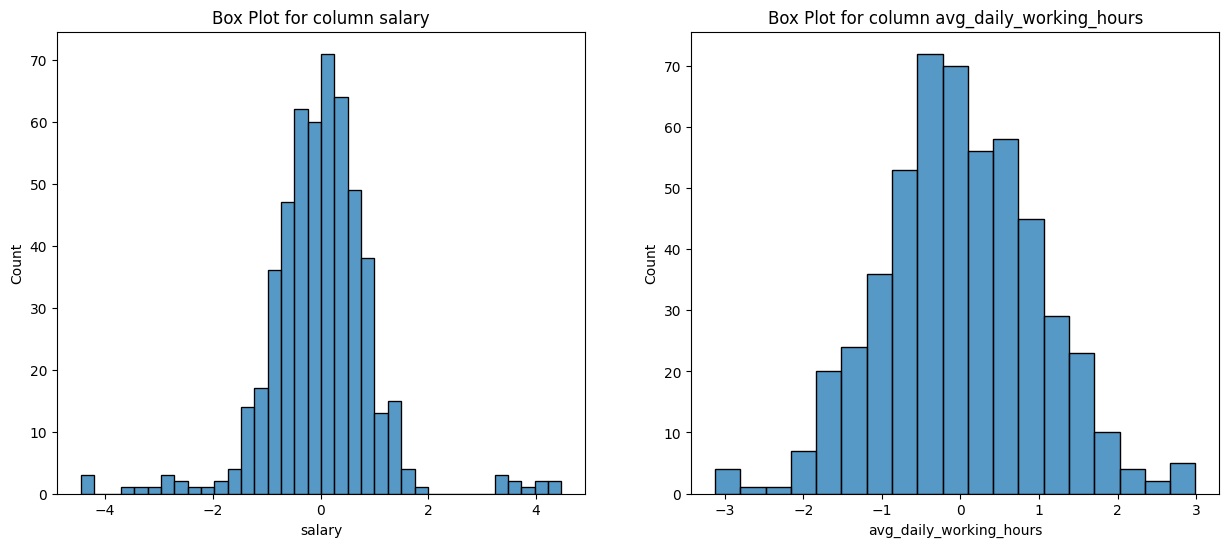

In [43]:
# plot box plot for the input columns after transformation

fig,ax = plt.subplots(1,2,figsize=(15,6))

for ind,col in enumerate(data_trans.columns):
    sns.histplot(data=data_trans,x=col,ax=ax[ind])
    ax[ind].set_title(f'Box Plot for column {col}')

plt.show()

- Even after transformation of the input it was unable to remove the outliers from the data.